In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'House_Rent_Dataset.csv'

In [ ]:
data.tail()

In [4]:
data.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3647,2022-05-25,2,12500,500,2 out of 3,Super Area,Kolathur,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner
2721,2022-05-08,2,18000,750,4 out of 4,Carpet Area,Mahavir Enclave Part 1,Delhi,Unfurnished,Bachelors,2,Contact Owner
4405,2022-07-07,2,24000,1350,1 out of 5,Carpet Area,Hitech City,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4665,2022-06-22,2,20000,1170,1 out of 2,Super Area,"Malakpet, NH 9",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
2958,2022-05-18,2,25000,950,Ground out of 4,Carpet Area,"East End Apartments, Ph. 1ext near new Ashok n...",Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [5]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [6]:
data.shape

(4746, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [8]:
# general description of dataset
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [9]:
data.describe(include='object')

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [10]:
data.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [11]:
# Check for duplicate values and then drop
duplicate_values = data.duplicated().sum()
duplicate_values

0

In [12]:
data = data.drop(['Posted On', 'Floor', 'Area Locality'], axis=1)
data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


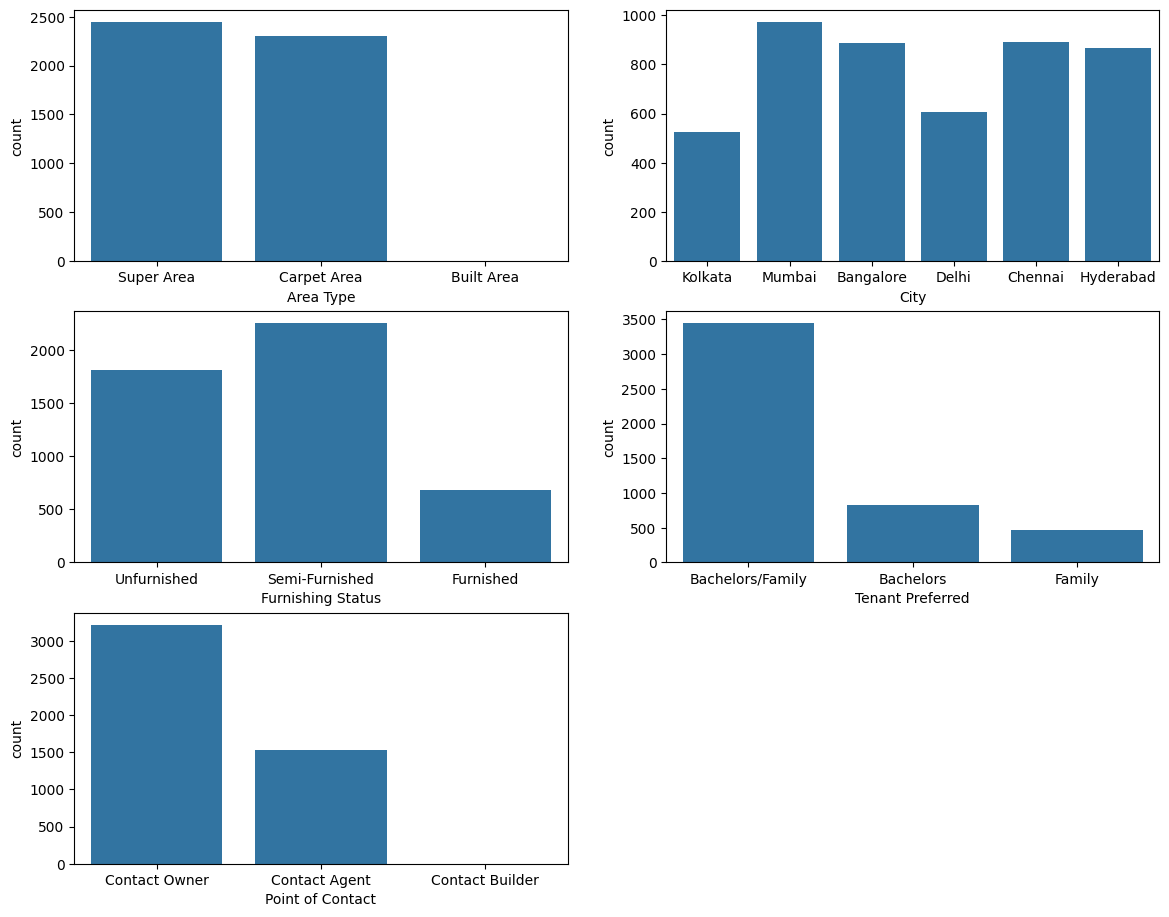

In [13]:
import seaborn as sns
plt.figure(figsize=(14,15))
for i,col in enumerate(["Area Type","City","Furnishing Status","Tenant Preferred","Point of Contact"]):
    plt.subplot(4,2,i+1)
    sns.countplot(data=data,x=col)

<Axes: xlabel='Rent', ylabel='Size'>

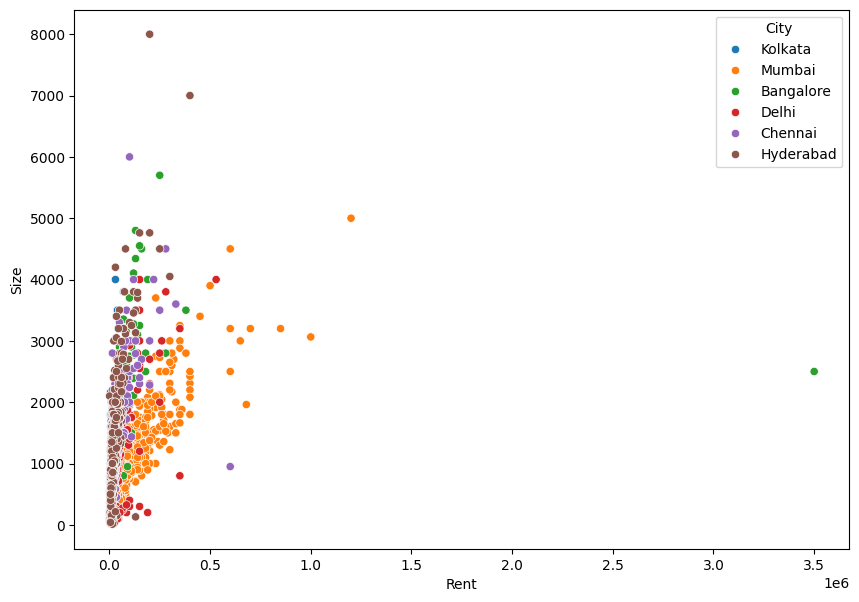

In [14]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x="Rent",y="Size",hue="City")

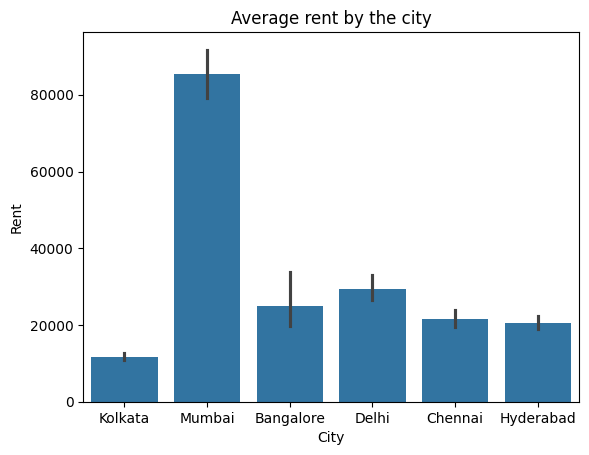

In [15]:
sns.barplot(data=data,x="City",y="Rent")
plt.title("Average rent by the city")
plt.show()

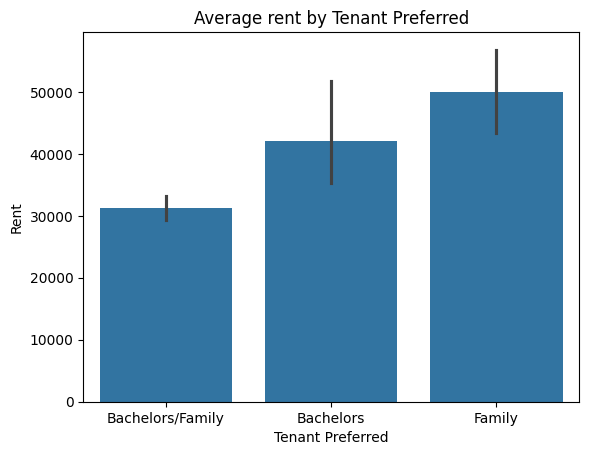

In [16]:
sns.barplot(data=data,x="Tenant Preferred",y="Rent")
plt.title("Average rent by Tenant Preferred")
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.svm import SVR
import sklearn.metrics as metrics
# import xgboost as xgb
# import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

In [18]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('Median absolute error: ',round(median_absolute_error,4))

In [19]:
x=data.drop(columns="Rent")
y=data["Rent"]

In [21]:
!pip install category_encoders
import category_encoders as ce

encoder = ce.LeaveOneOutEncoder(return_df=True)
x=encoder.fit_transform(x,y)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [22]:
x.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,18676.943967,11648.319312,22468.505513,31216.953238,2,16706.291757
1,2,800,18672.853988,11629.198853,38727.130222,31214.048795,1,16703.181337
2,2,1000,18674.080982,11634.934990,38728.463556,31214.920128,1,16704.114463
3,2,800,18676.943967,11648.319312,22468.505513,31216.953238,1,16706.291757
4,2,850,52405.438398,11653.099426,22469.883682,42185.583836,1,16707.069362


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [24]:
x_df = pd.DataFrame(x)
x_df

,0,1,2,3,4,5,6,7
0,0.2,0.136421,0.273162,0.004388,0.009553,0.017960,0.111111,0.003219
1,0.2,0.098874,0.273074,0.004130,0.487075,0.017809,0.000000,0.003165
2,0.2,0.123905,0.273100,0.004207,0.487114,0.017854,0.000000,0.003181
3,0.2,0.098874,0.273162,0.004388,0.009553,0.017960,0.000000,0.003219
4,0.2,0.105131,0.999941,0.004452,0.009593,0.587919,0.000000,0.003233
...,...,...,...,...,...,...,...,...
4741,0.2,0.123905,0.999871,0.124704,0.487140,0.017884,0.111111,0.003192
4742,0.4,0.249061,0.272994,0.124486,0.486957,0.017673,0.222222,0.003116
4743,0.4,0.217772,0.999683,0.124392,0.486879,0.017582,0.222222,0.999656
4744,0.4,0.186483,0.999589,0.124236,0.486748,0.995587,0.111111,0.999541


In [25]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20,random_state=40)


In [26]:
x_train.shape, x_test.shape

((3796, 8), (950, 8))

In [32]:
!pip install xgboost
import xgboost as xgb

model_rfr = RandomForestRegressor(n_estimators=7)
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror')
models = [model_rfr,model_dt,model_lr,model_xgb]

In [33]:
for model in models :
    print(f"fitting model: {model}")
    model.fit(x_train,y_train)

fitting model: RandomForestRegressor(n_estimators=7)
fitting model: DecisionTreeRegressor()
fitting model: LinearRegression()
fitting model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [34]:
for model in models:
    print(f"score of {model} for training data: {model.score(x_train,y_train)}")

score of RandomForestRegressor(n_estimators=7) for training data: 0.8277658734616686
score of DecisionTreeRegressor() for training data: 1.0
score of LinearRegression() for training data: 0.29297105483208685
score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) for training data: 0.999546468257904

In [35]:
for model in models[:]:
    y_predicted = model.predict(x_test)

    print(f"Report:{model}")
    print(f"{regression_results(y_test, y_predicted)}\n")

Report:RandomForestRegressor(n_estimators=7)
explained_variance:  0.908
r2:  0.908
MAE:  1194.7821
MSE:  304032555.9262
RMSE:  17436.5294
Median absolute error:  0.0
None

Report:DecisionTreeRegressor()
explained_variance:  0.9271
r2:  0.9271
MAE:  979.9684
MSE:  240860134.2021
RMSE:  15519.6693
Median absolute error:  0.0
None

Report:LinearRegression()
explained_variance:  0.4363
r2:  0.4349
MAE:  22345.7924
MSE:  1866578288.6182
RMSE:  43203.9152
Median absolute error:  16809.2852
None

Report:XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delt